# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('final_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[-1.88672986e-02  8.03000000e+02  5.18500000e+01  4.80000000e+01]
 [-2.54218009e-02  8.71000000e+02  3.72640000e+02  3.52500000e+01]
 [-2.49763033e-02  7.99000000e+02 -3.68570000e+02  3.47500000e+01]
 ...
 [-1.59946433e-02  7.64000000e+02  1.09750000e+02  3.45000000e+01]
 [-7.20438607e-03  8.80000000e+01 -6.84000000e+01  3.27500000e+01]
 [-5.19561595e-03  5.30000000e+01  3.51000000e+00  3.37500000e+01]]


In [4]:
print(y)

[ -1.9  -5.6   1.4  -2.4  -1.1 -10.2   0.4  -0.1  -2.   -5.8   1.2   0.
  -0.1   0.    0.  -11.  -31.   -5.   -1.   -5.    0.    0.  -20.    0.
   0.  -27.   -9.   -3.    0.  -17.    5.   -2.  -20.    1.    0.  -23.
   0.   -5.    0.   -1.  -27.   -5.    0.   -6.   60.   -4.   -8.   -5.
  -5.   -1.    0.  -18.   -6.    0.  -20.    1.   -9.   -7.   -3.   -1.
   0.    0.   -1.   -7.   -1.   -7.    0.   -3.    0.   -4.   -1.   -1.
   0.   35.   -3.   -1.  -26.   -2.    0.   -1.   -1.  -14.   -1.    0.
   0.    0.    0.    0.    0.    0.    0.   -2.   -2.   -1.    0.   -2.
  -1.   -1.   -3.    0.   -4.    0.   -1.   -5.   -1.   -2.    0.    0.
  -2.    0.    0.    0.   -1.   -2.   -1.   -2.   -1.  -16.    3.    1.
   0.   -1.    0.    0.   -2.    0.   -1.    0.    0.   -2.   -2.    0.
  -2.   -1.   -1.   -2.   -2.   -2.   -1.   -2.   -5.    0.   -2.   -3.
  -1.    0.    0.   -2.   -1.   56.    0.    0.   -7.   -6.    0.   -4.
 -23.   -3.    0.   -1.  -11.  -34.   -1.    0.   -1.    0.    0

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
print(X_train)

[[-1.45851648e-02  9.23000000e+02  2.75700000e+01  3.00000000e+01]
 [-1.15137363e-02  1.16200000e+03  0.00000000e+00  2.90000000e+01]
 [-8.89942529e-03  6.22000000e+02 -3.59800000e+01  3.55000000e+01]
 ...
 [-6.21978022e-03  1.08500000e+03  0.00000000e+00  4.20000000e+01]
 [-4.55769231e-02  4.87800000e+03 -1.28640000e+02  3.15000000e+01]
 [-3.07142857e-03  8.40000000e+01  0.00000000e+00  4.50000000e+01]]


In [7]:
print(y_train)

[ -2.   -1.   -1.    0.    0.   -1.   -1.   -1.   -1.    0.    0.   -1.
  -5.6 -11.   -5.    0.    0.   -2.   -1.    0.   -5.   -2.   -1.   -1.
   0.   -1.    0.   -4.    0.    0.   -1.    0.   -1.    0.   -7.   -2.
  -1.    0.   -1.   -2.  -20.   -4.    0.   -2.   -2.   -1.   -6.    0.
  -7.    0.   -1.   -5.    0.   -1.    0.  -23.   -1.    0.   -3.    3.
   0.   -1.   -4.    0.   -4.    0.   -3.   -1.   -7.    0.   -5.   -1.
   1.2  -2.    0.   -2.    0.   -4.   -4.    0.   -1.    0.   -4.    0.
   0.    0.    0.  -19.   -5.   -1.   -1.   -2.    0.    0.   -1.  -26.
  -5.    0.   -1.   -3.   -2.  -12.   -1.    0.   -6.   -3.   -2.    1.
  -1.    0.  -11.    3.   -0.1  -3.    0.   -9.   -1.    0.  -18.   -3.
 -18.    0.    0.   -3.   -6.    0.   -4.   -5.   -1.   -2.   -3.    0.
  -1.    0.    0.   -1.   -1.   -5.   -1.    0.    0.   -2.   -4.    0.
   0.   -2.   -8.   -7.  -18.    0.    0.    0.    0.   -7.    0.   -2.
 -23.  -14.   -1.   -3.   -1.    0.   -2.    0.    0.   -2.   -2

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
sc_X.fit_transform(X)
sc_y.fit_transform(y.reshape(len(y),1))
X_train = sc_X.transform(X_train)
y_train = sc_y.transform(y_train.reshape(len(y_train),1))
y_train = y_train.reshape(1,len(y_train))[0]

In [9]:
print(X_train)

[[ 0.01684123 -0.07693453  0.13515468 -0.79739758]
 [ 0.16018955  0.11724244 -0.00359094 -0.93703747]
 [ 0.28220348 -0.32148377 -0.18465977 -0.0293782 ]
 ...
 [ 0.40726665  0.05468333 -0.00359094  0.87828107]
 [-1.429592    3.13632872 -0.65096986 -0.58793775]
 [ 0.55420509 -0.75858507 -0.00359094  1.29720074]]


In [10]:
print(y_train)

[ 0.02472471  0.19062187  0.19062187  0.35651902  0.35651902  0.19062187
  0.19062187  0.19062187  0.19062187  0.35651902  0.35651902  0.19062187
 -0.57250503 -1.46834964 -0.47296674  0.35651902  0.35651902  0.02472471
  0.19062187  0.35651902 -0.47296674  0.02472471  0.19062187  0.19062187
  0.35651902  0.19062187  0.35651902 -0.30706959  0.35651902  0.35651902
  0.19062187  0.35651902  0.19062187  0.35651902 -0.80476104  0.02472471
  0.19062187  0.35651902  0.19062187  0.02472471 -2.961424   -0.30706959
  0.35651902  0.02472471  0.02472471  0.19062187 -0.63886389  0.35651902
 -0.80476104  0.35651902  0.19062187 -0.47296674  0.35651902  0.19062187
  0.35651902 -3.45911545  0.19062187  0.35651902 -0.14117244  0.85421047
  0.35651902  0.19062187 -0.30706959  0.35651902 -0.30706959  0.35651902
 -0.14117244  0.19062187 -0.80476104  0.35651902 -0.47296674  0.19062187
  0.5555956   0.02472471  0.35651902  0.02472471  0.35651902 -0.30706959
 -0.30706959  0.35651902  0.19062187  0.35651902 -0

## Training the Multiple Linear Regression model on the Training set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

Test dataset length 187
Mean Difference: 1.5854944432866673
Median Difference: 0.6343532867188919
Standard Deviation of Difference: 3.056028412617609


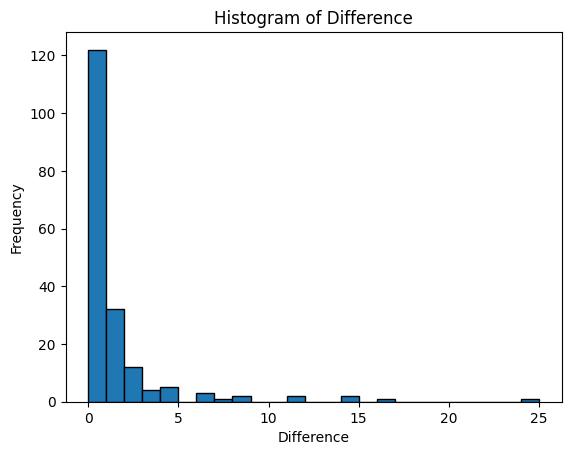

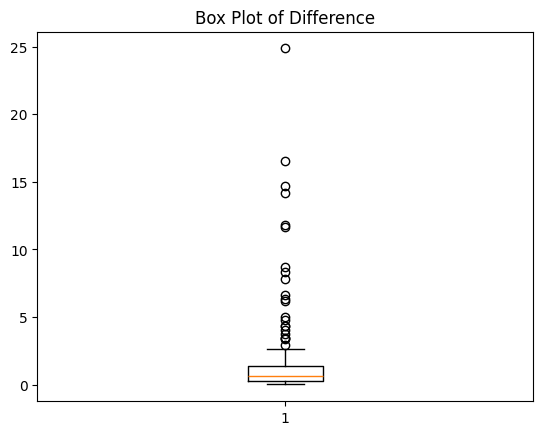

-0.1646161670411841 0.0
-1.1401942218220604 -1.0
0.1623299336139028 0.0
-0.25710932782872065 0.0
-1.3321438344329088 -1.0
-0.6655687294268988 0.0
-0.7607858313339912 -1.0
-0.013429301062295451 0.0
7.361106949815784 1.0
-0.13498724573967014 -2.0
0.15525435802478826 0.0
-0.05012218256997292 -1.0
-0.9726008360219367 0.0
-3.4374591583056513 -2.0
0.30388141886613385 0.0
-9.014256130558099 -7.0
-0.4771816940572795 -1.0
0.33045056744276824 0.0
-0.15465934139037407 -1.0
-3.50111166688251 -2.0
0.1776741759079541 -1.0
-3.5467182507995236 -7.0
-0.22740796655655182 0.0
-3.851856035650399 -3.0
0.2068487876973215 0.0
-0.4588229232115577 -1.0
-0.3470420683251061 -1.0
-3.762932863542355 -3.0
-3.819748560082339 -3.0
-2.674297427556406 -11.0
-0.33669776410023355 -1.0
-4.933498505852572 -9.0
-2.735727893809326 -2.0
-1.428229684462543 0.0
-3.185111245456432 -2.0
0.009070903529336594 0.0
-1.0785963143916448 -2.0
-0.21446631934067906 -12.0
-0.34925832544134283 0.0
-0.25138754439829003 0.0
0.2438815902540509

In [12]:
from math import floor, ceil
y_pred = sc_y.inverse_transform([regressor.predict(sc_X.transform(X_test))])[0]

absolute_difference = np.abs(y_test - y_pred)

max_difference = np.max(absolute_difference)
mean_difference = np.mean(absolute_difference)
median_difference = np.median(absolute_difference)
std_dev_difference = np.std(absolute_difference)

# Print the results
print("Test dataset length", len(y_test))
print("Mean Difference:", mean_difference)
print("Median Difference:", median_difference)
print("Standard Deviation of Difference:", std_dev_difference)

plt.hist(absolute_difference, bins=range(floor(min(absolute_difference)), ceil(max(absolute_difference)+1)), edgecolor='black')
plt.title('Histogram of Difference')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()

plt.boxplot(x=absolute_difference)
plt.title('Box Plot of Difference')
plt.show()


for y_p, y_t in zip(y_pred, y_test):
    print(y_p, y_t)



## Export model

In [13]:
from joblib import dump

dump(regressor, 'multiple_linear_regression.joblib')
dump(sc_X, 'X_scaler.joblib')
dump(sc_y, 'y_scaler.joblib')

['y_scaler.joblib']